<a href="https://colab.research.google.com/github/krishbhowmick/Machine_Learning/blob/master/03_K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cricket_data=pd.read_excel(r"/content/drive/My Drive/IITB_ML/IITB_ML_Data/Cricket_Data.xlsx")

In [ ]:
cricket_data.head()

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,TEST
1,147,143,5238,39.68,85.25,ODI
2,71,122,6147,53.92,58.22,TEST
3,211,203,9779,58.20,92.12,ODI
4,62,58,2102,48.88,136.22,T20


# **Pre-processing **

In [ ]:
c_data=cricket_data.drop(["CATEGORY"],axis=1)

In [ ]:
c_data

,Mat,Inns,Runs,Ave,SR
0,58,104,4154,41.95,51.49
1,147,143,5238,39.68,85.25
2,71,122,6147,53.92,58.22
3,211,203,9779,58.20,92.12
4,62,58,2102,48.88,136.22
...,...,...,...,...,...
70,77,71,1825,37.24,124.31
71,62,105,4809,49.57,46.90
72,25,43,1479,39.97,55.14
73,183,177,6748,44.98,87.18


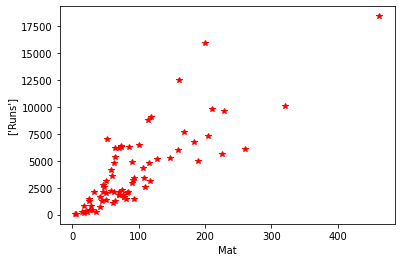

In [ ]:
plt.plot(c_data["Mat"],c_data["Runs"],'r*')
plt.xlabel("Mat")
plt.ylabel(["Runs"])
plt.show()

In [ ]:
# Convert the data into array
data_array=c_data.values

# **Algorithm Start**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Kmean_model=KMeans(n_clusters=3,max_iter=200).fit(data_array)

In [ ]:
# labels_ This function classify the cluster
Kmean_model.labels_

array([0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:
c_data["Cluster"]=Kmean_model.labels_

In [ ]:
# map- differentiate the 
#c_data["Cluster"]=c_data["Cluster"].map({1:"Centrod_1",0:"Centrod_2"})

In [ ]:
c_data

,Mat,Inns,Runs,Ave,SR,Cluster
0,58,104,4154,41.95,51.49,1
1,147,143,5238,39.68,85.25,1
2,71,122,6147,53.92,58.22,1
3,211,203,9779,58.20,92.12,1
4,62,58,2102,48.88,136.22,0
...,...,...,...,...,...,...
70,77,71,1825,37.24,124.31,0
71,62,105,4809,49.57,46.90,1
72,25,43,1479,39.97,55.14,0
73,183,177,6748,44.98,87.18,1


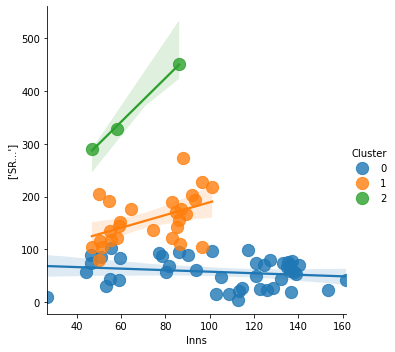

In [ ]:
sb.lmplot("SR","Inns",data=c_data,fit_reg=True,scatter_kws={"s":150},hue="Cluster")
plt.xlabel("Inns")
plt.ylabel(["SR..."])
plt.show()

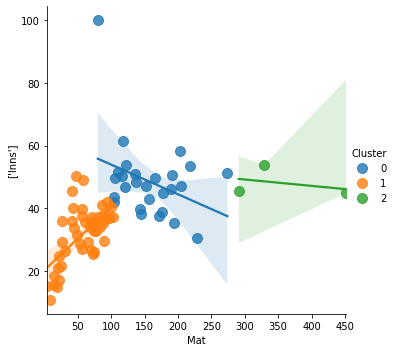

In [ ]:
sb.lmplot("Inns","Ave",data=c_data,fit_reg=True,scatter_kws={"s":100},hue="Cluster")
plt.xlabel("Mat")
plt.ylabel(["Inns"])
plt.show()

In [ ]:
# inertia_ - sum of all intra cluster distance
Kmean_model.inertia_

136646128.18473926

In [ ]:
# cluster_centers_ differentiate all the diatance
#Kmean_model.cluster_centers_

In [ ]:
#c1=Kmean_model.cluster_centers_[0]
#c1

In [ ]:
#c2=Kmean_model.cluster_centers_[1]
#c2

In [ ]:
#f_name=c_data.columns
#f_name

# **Choose the K value**

In [ ]:
#kmm=KMeans()

In [ ]:
#kmm

In [ ]:
#kmax=int(round(np.sqrt(len(mydata_customer))))


In [ ]:
kmax=50
wss=[]                                                     # empty list
for k in range(1,kmax):                                    # For loop
    #print(k)
    km_model=KMeans(n_clusters=k)                          # K value set
    km_model=km_model.fit(data_array)                      # Train the model
    #print(f"number of cluster is {k} and wss is {km_model.inertia_}")       #Print all the inertia respect to all value ofk
    wss.append(km_model.inertia_)                          # Put all the value of k in list

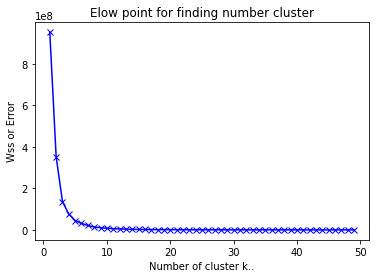

In [ ]:
k_range=list(range(1,kmax))                           # K_value (0-50)

plt.plot(k_range,wss,'bx-')                           # (X,Y,*)
plt.xlabel("Number of cluster k..")                   # X_axis 
plt.ylabel("Wss or Error")                            # Y_axis
plt.title("Elow point for finding number cluster")    # Titel
plt.show()                                            # Plot the graph

## **Put the K-value and plot the graph**

In [ ]:
Kmean_model=KMeans(n_clusters=4,max_iter=200).fit(data_array)
Kmean_model.labels_


array([2, 2, 2, 1, 0, 3, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 0], dtype=int32)

In [ ]:
c_data["Cluster"]=Kmean_model.labels_

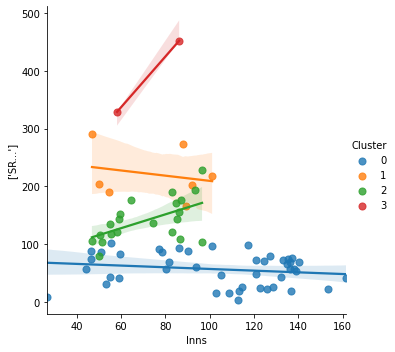

In [ ]:
sb.lmplot("SR","Inns",data=c_data,fit_reg=True,scatter_kws={"s":50},hue="Cluster")
plt.xlabel("Inns")
plt.ylabel(["SR..."])
plt.show()

In [ ]:
Kmean_model.inertia_

76486946.74615143

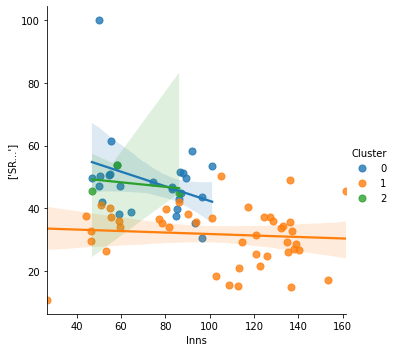

In [ ]:
Kmean_model=KMeans(n_clusters=3,max_iter=1000).fit(data_array)
c_data["Cluster"]=Kmean_model.labels_

sb.lmplot("SR","Ave",data=c_data,fit_reg=True,scatter_kws={"s":50},hue="Cluster")
plt.xlabel("Inns")
plt.ylabel(["SR..."])
plt.show()